In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
from base import ts_pro
pro=ts_pro()

# 大盘分析

In [2]:
from plot_index import Index_data

In [3]:
Index_data('上证综指').kline_plot(ktype=0)

In [4]:
Index_data('上证综指').kline_plot(ktype=1)

# 个股分析

## 导入数据库和个股py文件

In [2]:
from update_sql import update_sql,get_trade_date,info_sql
from RPS import get_data,RPS
from plot_stock import stock_plot

In [6]:
#更新数据库
update_sql(table_name='daily_data')

数据库已更新至20191121日数据


In [8]:
#获取数据库信息
info_sql()

统计查询的总数：7739757
数据期间：20050104——20191121
数据库包含股票个数：3721


## 个股RPS相对强弱分析

In [3]:
#获取rps数据
data=get_data(date='20180101')
rps=RPS(data)
df=rps.date_rps()

In [4]:
#查看20日内强势股
df.sort_values('rps_5',ascending=False)[:20]

,rps_5,rps_20,rps_60,rps_120,rps_250
麦克奥迪,99.965217,99.930435,99.860870,99.234783,97.843478
鼎龙文化,99.930435,99.826087,97.252174,84.069565,41.982609
聚力文化,99.895652,98.817391,89.495652,87.408696,2.191304
深大通,99.860870,98.434783,98.469565,97.286957,66.260870
长城动漫,99.826087,91.060870,78.504348,69.182609,26.678261
盛天网络,99.791304,97.113043,97.808696,97.426087,92.382609
安源煤业,99.756522,88.521739,75.234783,29.182609,53.356522
号百控股,99.721739,89.147826,97.634783,88.034783,95.965217
三七互娱,99.686957,99.547826,97.878261,98.991304,94.817391
博通股份,99.652174,99.756522,98.295652,95.860870,93.495652


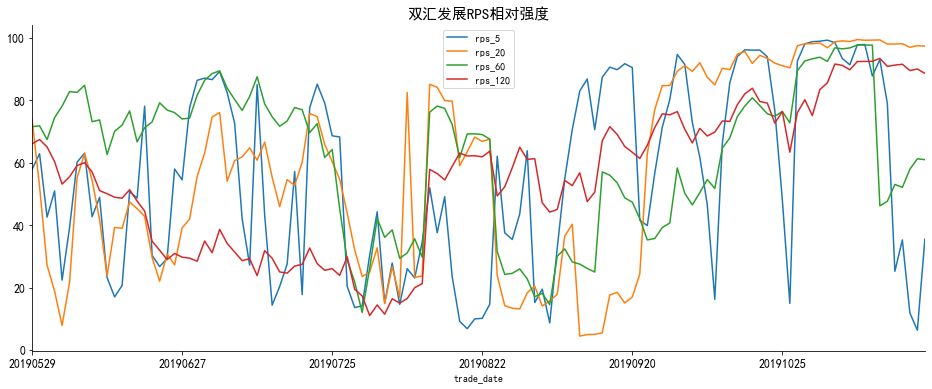

In [5]:
#个股rps时间序列图
rps.plot_stock_rps('双汇发展')

In [6]:
stock_plot('双汇发展').kline_plot(ktype=1)

In [23]:
#根据rps选股
x1=(df.rps_250>80) & (df.rps_250<95)
x2=(df.rps_120>80) & (df.rps_120<95)
x3=(df.rps_60>90)  & (df.rps_60<100)
x4=(df.rps_20>90)  & (df.rps_20<100)
x5=(df.rps_5>90)   & (df.rps_5<100)
x=x1&x2&x3&x4&x5
stocks=list(df[x].index)
print(len(stocks))
print(stocks)

13
['GQY视讯', '万达信息', '全志科技', '华宇软件', '尔康制药', '德宏股份', '恩捷股份', '景嘉微', '永新股份', '海联讯', '芒果超媒', '英飞拓', '迈克生物']


In [27]:
i=3
stock_plot(stocks[i]).kline_plot(ktype=0)

In [21]:
stock_plot(stocks[i]).kline_plot(ktype=1)

In [30]:
all_df=get_data(date='20040101')

In [37]:
all_df.index=pd.to_datetime(all_df.index)

In [40]:
new_df=all_df.to_period('Y')

In [45]:
dd=new_df.groupby(new_df.index).apply(lambda x: (((x/x.shift(1)-1).fillna(0)+1.0).cumprod()).iloc[-1])

In [68]:
final_df=pd.DataFrame()
final_df['股票名称']=dd.T.idxmax()
final_df['累计收益率']=dd.T.max()-1
#股票代码
code_list=pro.stock_basic(list_status='L').ts_code.values
name_list=pro.stock_basic(list_status='L').name.values
stock_dict=dict(zip(name_list,code_list))
final_df['code']=[stock_dict[name] for name in list(final_df['股票名称'])]
final_df

,股票名称,累计收益率,code
trade_date,,,
2005,保变电气,1.331400,600550.SH
2006,泛海控股,4.242846,000046.SZ
2007,亿帆医药,10.391680,002019.SZ
2008,东方雨虹,0.655828,002271.SZ
2009,苏常柴A,6.206567,000570.SZ
2010,广晟有色,3.550384,600259.SH
2011,华夏幸福,1.684997,600340.SH
2012,国海证券,1.824898,000750.SZ
2013,奋达科技,4.366712,002681.SZ


In [97]:
attr=[str(i)+'\n'+str(j) for (i,j) in  zip(attr.values,attr.index)]

In [132]:
from pyecharts import *
#attr=final_df.股票名称
v=final_df.累计收益率.round(2)
bar=Bar('历年涨幅最大个股\n2005年-2019年',
       width=900,height=400,title_pos='center')
bar.add('',attr,v,is_splitline_show=False,
        is_label_show=True,xaxis_label_textsize=9,
       is_datazoom_show=False)
bar

In [149]:
def find_50(year):
    year=str(year)
    data=all_df[:year]
    all_ret=data.apply(lambda x: (((x/x.shift(1)-1).fillna(0)+1.0).cumprod()).iloc[-1])
    dd=all_ret.sort_values(ascending=False)[:50]
    dd=dd.round(2)
    return dd

In [157]:
ng50=pd.DataFrame()
for year in range(2005,2020):
    ng50[str(year)]=list(zip(find_50(year).index,find_50(year).values))

2005年至2005前50只牛股累计涨幅
2005年至2005前50只牛股累计涨幅
2005年至2006前50只牛股累计涨幅
2005年至2006前50只牛股累计涨幅
2005年至2007前50只牛股累计涨幅
2005年至2007前50只牛股累计涨幅
2005年至2008前50只牛股累计涨幅
2005年至2008前50只牛股累计涨幅
2005年至2009前50只牛股累计涨幅
2005年至2009前50只牛股累计涨幅
2005年至2010前50只牛股累计涨幅
2005年至2010前50只牛股累计涨幅
2005年至2011前50只牛股累计涨幅
2005年至2011前50只牛股累计涨幅
2005年至2012前50只牛股累计涨幅
2005年至2012前50只牛股累计涨幅
2005年至2013前50只牛股累计涨幅
2005年至2013前50只牛股累计涨幅
2005年至2014前50只牛股累计涨幅
2005年至2014前50只牛股累计涨幅
2005年至2015前50只牛股累计涨幅
2005年至2015前50只牛股累计涨幅
2005年至2016前50只牛股累计涨幅
2005年至2016前50只牛股累计涨幅
2005年至2017前50只牛股累计涨幅
2005年至2017前50只牛股累计涨幅
2005年至2018前50只牛股累计涨幅
2005年至2018前50只牛股累计涨幅
2005年至2019前50只牛股累计涨幅
2005年至2019前50只牛股累计涨幅


In [162]:
ng50[:5].T

,0,1,2,3,4
2005,"(保变电气, 2.33)","(航天电器, 2.23)","(洪都航空, 2.08)","(银座股份, 1.91)","(张裕A, 1.87)"
2006,"(泸州老窖, 8.51)","(宝钛股份, 6.51)","(苏宁易购, 6.13)","(贵州茅台, 5.9)","(中金岭南, 5.6)"
2007,"(中国船舶, 27.2)","(泸州老窖, 25.6)","(中金黄金, 25.55)","(辽宁成大, 22.13)","(宏达股份, 20.06)"
2008,"(置信电气, 16.25)","(双鹭药业, 14.35)","(华兰生物, 10.29)","(泸州老窖, 10.0)","(国药股份, 9.88)"
2009,"(中金黄金, 29.18)","(山东黄金, 23.64)","(华兰生物, 23.0)","(泸州老窖, 21.62)","(中国中期, 21.29)"
2010,"(中金黄金, 37.21)","(华兰生物, 31.69)","(山东黄金, 30.9)","(中恒集团, 27.88)","(广晟有色, 27.02)"
2011,"(精功科技, 26.64)","(泸州老窖, 23.2)","(三一重工, 22.4)","(中金黄金, 21.56)","(华兰生物, 19.96)"
2012,"(北方稀土, 32.94)","(中金黄金, 30.38)","(广晟有色, 24.22)","(双鹭药业, 24.18)","(泸州老窖, 22.28)"
2013,"(双鹭药业, 37.21)","(上海家化, 29.38)","(启迪环境, 25.48)","(中恒集团, 24.66)","(华兰生物, 23.23)"
2014,"(华夏幸福, 34.76)","(恒生电子, 31.84)","(中恒集团, 30.07)","(双鹭药业, 29.29)","(国药股份, 28.18)"
